## MNISTデータセットの次元圧縮

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, Y_str = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# 正解ラベルは文字列で渡されるため数値に変換
Y = Y_str.astype('int')

# - データ数が多くCVやグリッドサーチでは時間がかかるので、ここではホールドアウト法を用いる
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## PCA（主成分分析）

各標本（MNISTの場合は数字のベクトル）を区別しやすい座標軸に取り直した無相関の合成変数を生成

- もとの次元と同じ数の合成変数が作られる

In [2]:
from sklearn.decomposition import PCA

# 主成分分析 PCA の初期化
# - n_components=None: 主成分はもとの説明変数と同数
pca = PCA(n_components=None)

# 学習・変換
X_train_PCA = pca.fit_transform(X_train)

# 結果
# - explained_variance_ratio_: 各主成分が元のデータを説明する割合（最初の5成分）
pca.explained_variance_ratio_[0:5]

array([0.09759616, 0.07156781, 0.06157471, 0.05421856, 0.04890311])

### 散布図による可視化

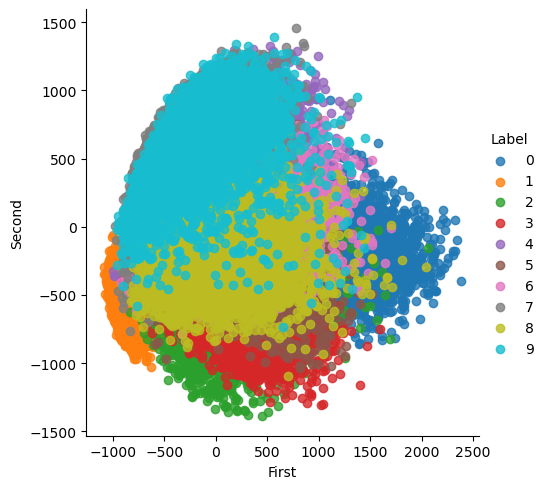

In [3]:
import pandas as pd
import seaborn as sns

# 第 1, 2 主成分
df_x = pd.DataFrame(X_train_PCA[:, 0:2])
# 数字のラベル
df_y = pd.DataFrame(Y_train)
# 結合した DataFrame
df = pd.concat([df_x, df_y], axis=1)
df.columns = ['First', 'Second', 'Label']

# 各数字を色分けした第 1, 2 主成分の散布図
# - 各数字がまとまっていることが見てとれる
sns.lmplot(data=df, x='First', y='Second', hue='Label', fit_reg=False)

### 分類

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def test_model(model, X_train, X_test, Y_train, Y_test):
    # 教師データを学習
    model.fit(X_train, Y_train)

    # テストデータについてモデルからの予測値を計算
    Y_predict = model.predict(X_test)

    # 精度の表示
    print(classification_report(Y_test, Y_predict, digits=3))

    # 混同行列の可視化
    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_matrix(Y_test, Y_predict),
                square=True, cbar=True, annot=True, cmap='Blues')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

              precision    recall  f1-score   support

           0      0.642     0.705     0.672      2076
           1      0.872     0.918     0.895      2390
           2      0.260     0.213     0.234      2124
           3      0.440     0.470     0.454      2165
           4      0.347     0.364     0.355      2063
           5      0.191     0.172     0.181      1923
           6      0.281     0.308     0.294      1999
           7      0.397     0.391     0.394      2156
           8      0.243     0.235     0.239      2048
           9      0.299     0.285     0.292      2056

    accuracy                          0.416     21000
   macro avg      0.397     0.406     0.401     21000
weighted avg      0.406     0.416     0.411     21000



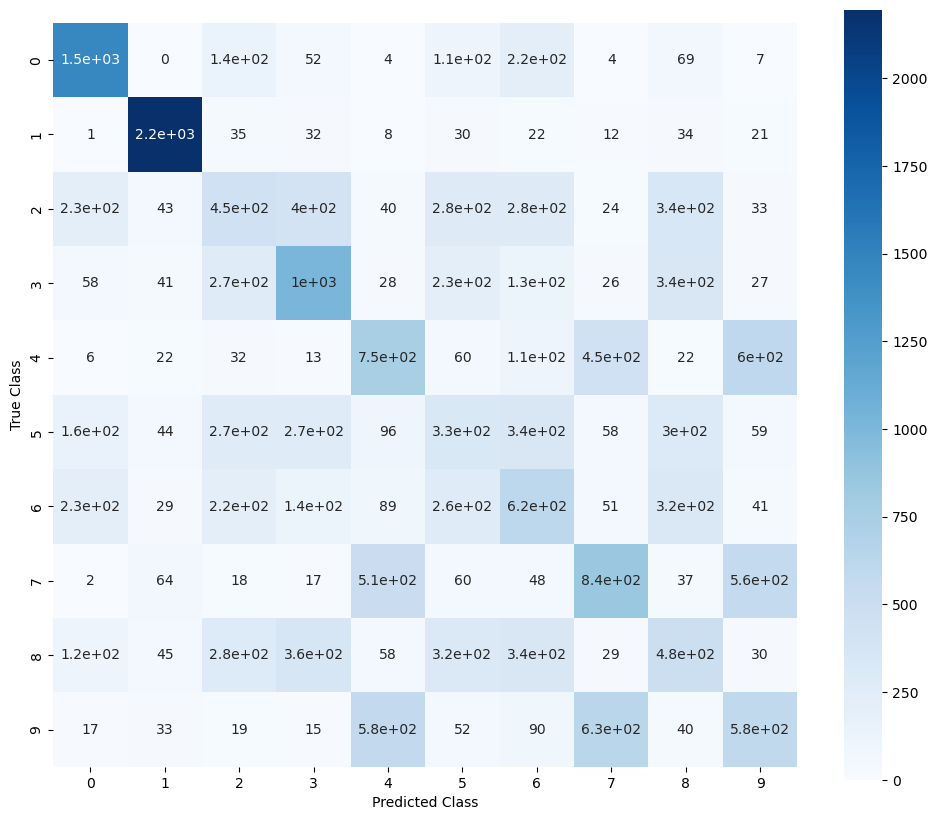

In [5]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレスト
model = RandomForestClassifier(n_jobs=-1)

# テストデータ
X_test_PCA = pca.transform(X_test)

# 分類器の精度検証: 2成分
i = 2
test_model(model, X_train_PCA[:, 0:i], X_test_PCA[:, 0:i], Y_train, Y_test)

              precision    recall  f1-score   support

           0      0.940     0.948     0.944      2076
           1      0.975     0.979     0.977      2390
           2      0.926     0.929     0.928      2124
           3      0.886     0.867     0.876      2165
           4      0.891     0.861     0.876      2063
           5      0.888     0.902     0.895      1923
           6      0.944     0.954     0.949      1999
           7      0.928     0.933     0.930      2156
           8      0.877     0.857     0.867      2048
           9      0.827     0.853     0.840      2056

    accuracy                          0.909     21000
   macro avg      0.908     0.908     0.908     21000
weighted avg      0.909     0.909     0.909     21000



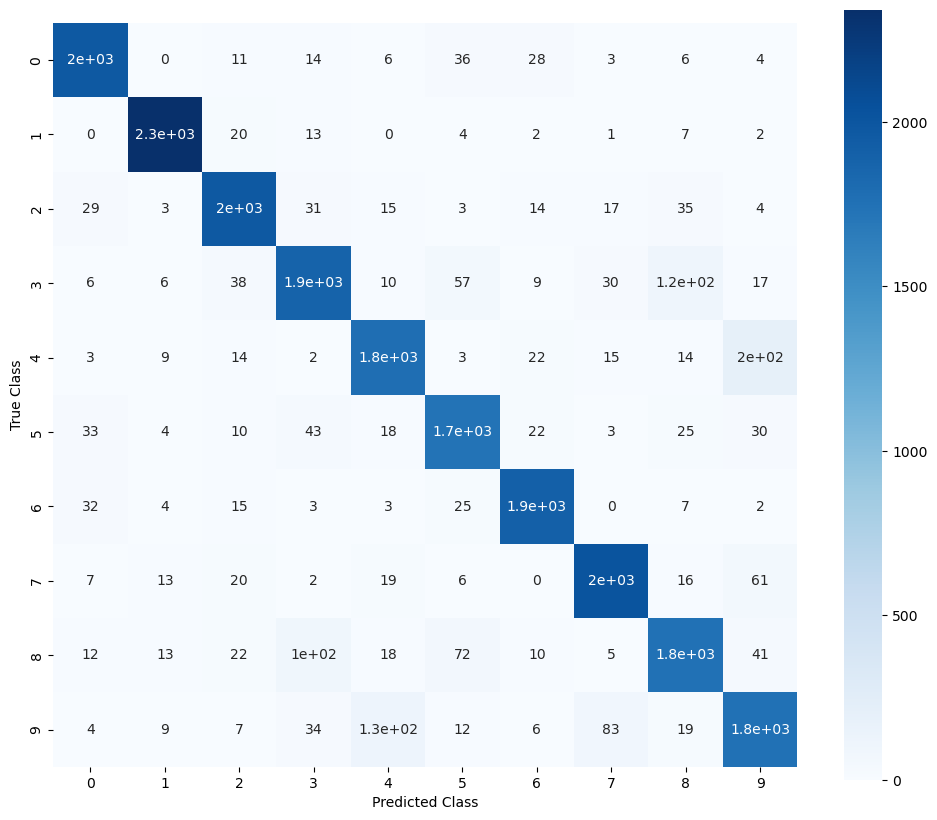

In [6]:
# 分類器の精度検証: 10成分
i = 10
test_model(model, X_train_PCA[:, 0:i], X_test_PCA[:, 0:i], Y_train, Y_test)

## LSA

In [7]:
from sklearn.decomposition import TruncatedSVD

# 初期化
# - n_components: トピック数
svd = TruncatedSVD(n_components=10)

# トピックへの分解
X_train_SVD = svd.fit_transform(X_train)

### 散布図による可視化

In [8]:
# 第 1, 2 成分
df_x = pd.DataFrame(X_train_SVD[:, 0:2])
# 数字のラベル
df_y = pd.DataFrame(Y_train)
# 結合した DataFrame
df = pd.concat([df_x, df_y], axis=1)
df.columns = ['First', 'Second', 'Label']

# 各数字を色分けした第 1, 2 成分の散布図
sns.lmplot(data=df, x='First', y='Second', hue='Label', fit_reg=False)

### 分類

              precision    recall  f1-score   support

           0      0.684     0.725     0.704      2076
           1      0.804     0.864     0.833      2390
           2      0.150     0.145     0.147      2124
           3      0.152     0.154     0.153      2165
           4      0.143     0.129     0.136      2063
           5      0.157     0.146     0.151      1923
           6      0.144     0.139     0.142      1999
           7      0.183     0.192     0.187      2156
           8      0.273     0.307     0.289      2048
           9      0.149     0.133     0.140      2056

    accuracy                          0.302     21000
   macro avg      0.284     0.293     0.288     21000
weighted avg      0.292     0.302     0.297     21000



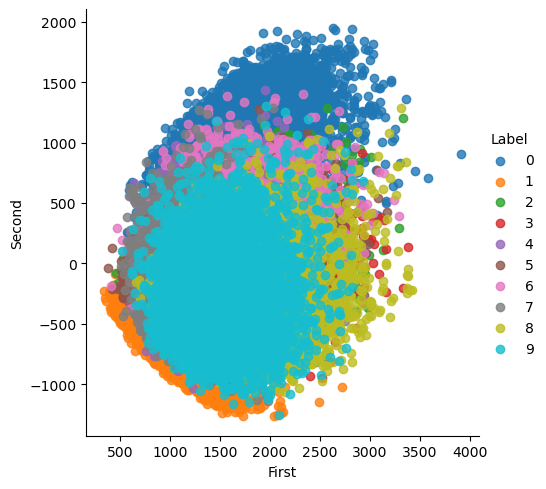

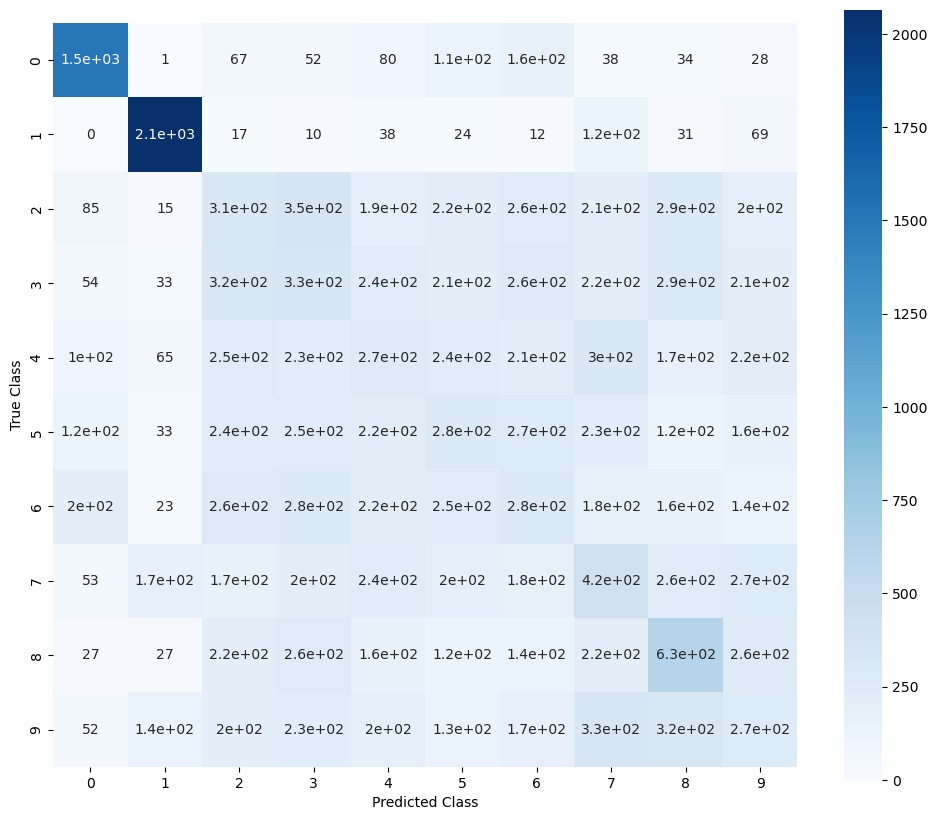

In [9]:
# ランダムフォレスト
model = RandomForestClassifier(n_jobs=-1)

# テストデータ
X_test_SVD = svd.transform(X_test)
    
# 分類器の精度検証: 2成分
i = 2
test_model(model, X_train_SVD[:, 0:i], X_test_SVD[:, 0:i], Y_train, Y_test)

              precision    recall  f1-score   support

           0      0.952     0.949     0.951      2076
           1      0.977     0.981     0.979      2390
           2      0.931     0.934     0.933      2124
           3      0.896     0.866     0.881      2165
           4      0.883     0.877     0.880      2063
           5      0.881     0.912     0.896      1923
           6      0.942     0.958     0.950      1999
           7      0.925     0.933     0.929      2156
           8      0.888     0.852     0.870      2048
           9      0.833     0.848     0.841      2056

    accuracy                          0.912     21000
   macro avg      0.911     0.911     0.911     21000
weighted avg      0.912     0.912     0.912     21000



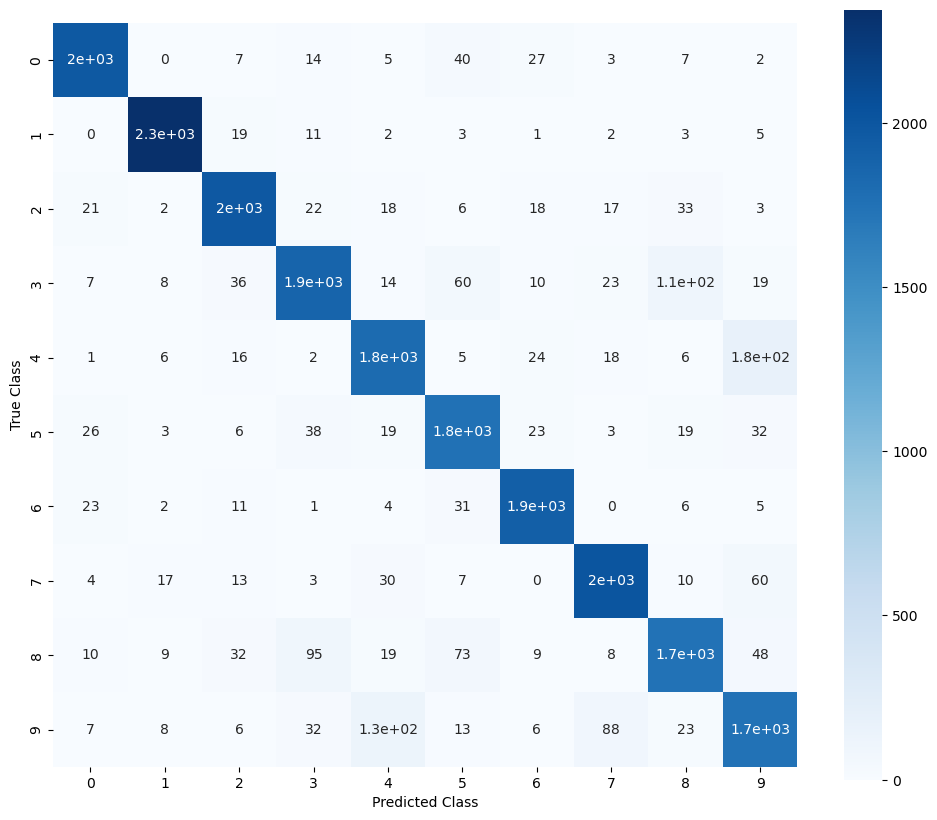

In [10]:
# 分類器の精度検証: 10成分
i = 10
test_model(model, X_train_SVD[:, 0:i], X_test_SVD[:, 0:i], Y_train, Y_test)